# Importing the Dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yashpaloswal/ann-car-sales-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ann-car-sales-price-prediction


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv


In [3]:
import pandas as pd
df = pd.read_csv('/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv', encoding = 'latin1')

# Descriptive Statistics

In [4]:
print(df)

       customer name                                    customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

          country  gender        age  annual Salary  credit card debt  \
0        Bulgaria       0 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


# Visualizing Outliers

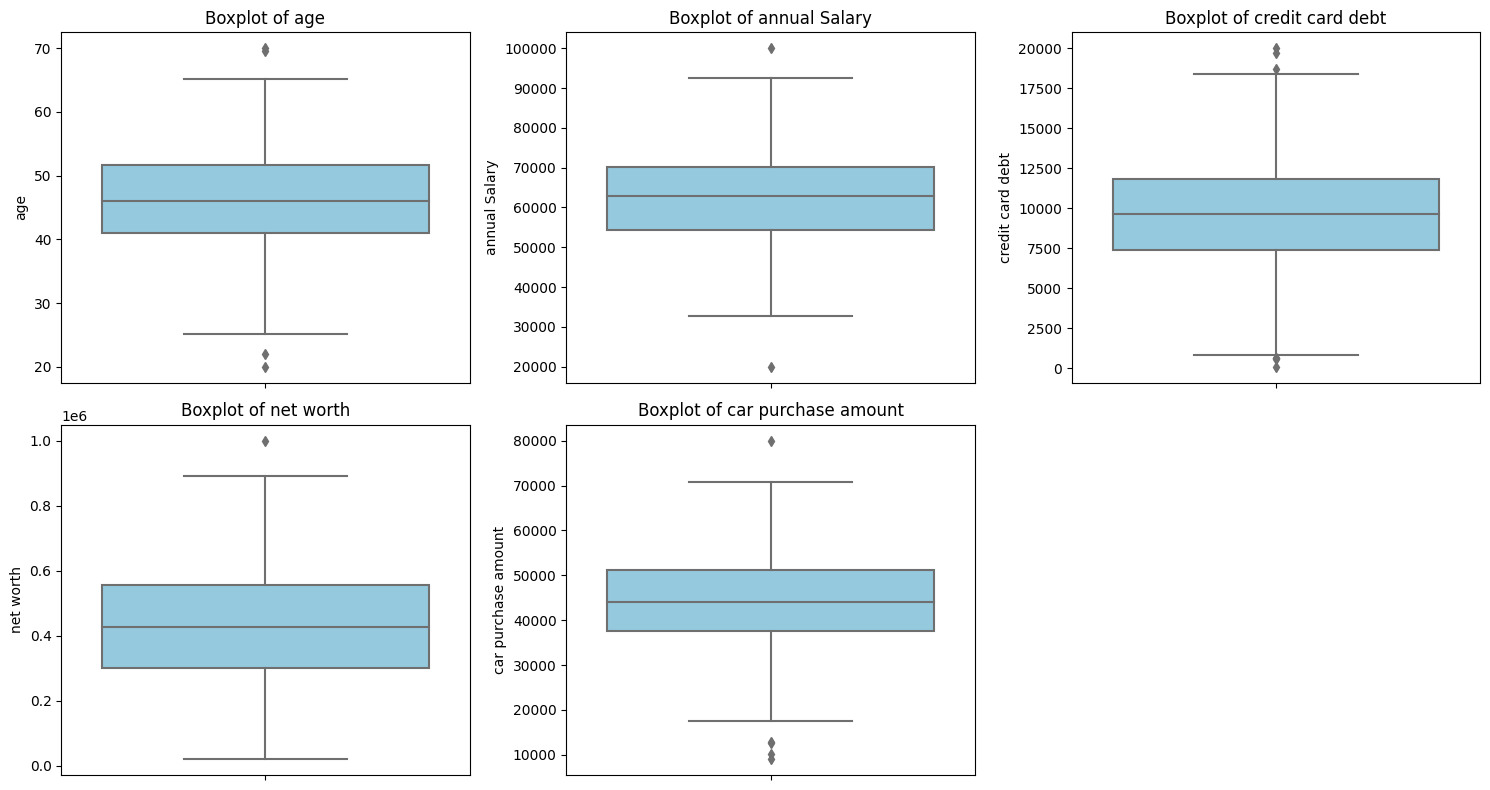

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named `df`
numeric_columns = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

# Set plot size
plt.figure(figsize=(15, 8))

# Create a boxplot for each numeric column
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### Boxplot Analysis Summary

- **Outliers Detected:**
  - **Age:** Few outliers present below 25 and above 65 years.
  - **Annual Salary:** Outliers below \$20,000  and  above \$95,000.
  - **Credit Card Debt:** Some very high and very low outliers, especially near 0 and above \$18,000.
  - **Net Worth:** Significant outliers at the higher end (above \$900,000).
  - **Car Purchase Amount:** Outliers for very low and very high purchase amounts.

- **Spread and Central Tendency:**
  - **Age** and **Annual Salary** are moderately spread with no extreme skewness.
  - **Credit Card Debt** has a larger spread, suggesting diverse financial behavior.
  - **Net Worth** distribution is right-skewed (most customers have moderate net worth, few are extremely wealthy).
  - **Car Purchase Amount** shows a fairly symmetric distribution around the median.

> Conclusion: Handling outliers, especially in **net worth**, **annual salary**, and **car purchase amount**, will be crucial for building a robust prediction model.


In [7]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [8]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [9]:
columns = ['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount']

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

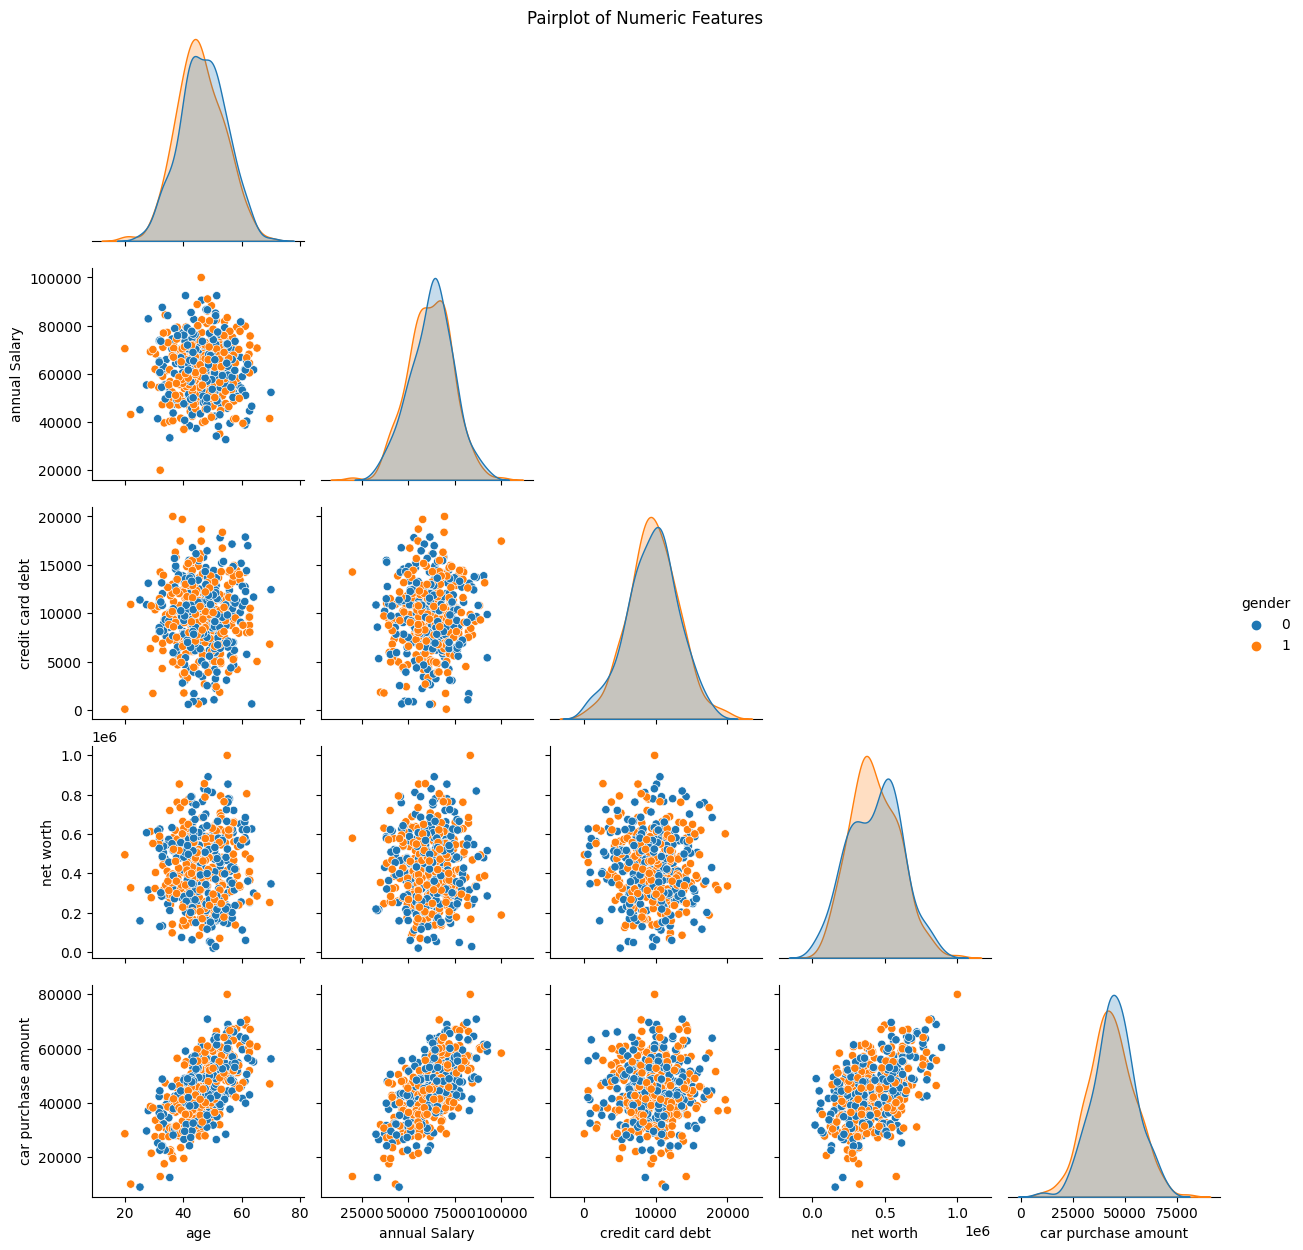

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[numeric_columns + ['gender']], hue='gender', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Numeric Features', y=1.00)
plt.show()


### Pairplot Analysis Summary

- **Relationships Observed:**
  - Positive correlation between **Age** and **Car Purchase Amount**.
  - Positive correlation between **Annual Salary** and **Net Worth**.
  - **Credit Card Debt** shows no strong correlation with other variables.

- **Feature Distributions:**
  - **Age** is slightly right-skewed.
  - **Annual Salary** is mostly normal with a few high outliers.
  - **Net Worth** is heavily right-skewed (few very rich customers).
  - **Car Purchase Amount** appears normally distributed.

- **Gender Effect:**
  - No major difference observed between genders across numeric features.

- **Outliers:**
  - Present in **Annual Salary**, **Credit Card Debt**, and **Net Worth**.
  - Need to be handled to improve model performance.

> Overall, age, net worth, and salary appear to be important predictors for car purchase amount.


**Outlier Removal**

In [11]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        lower = q1 - 1.5 * IQR
        upper = q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]  # corrected this line
    return df

# Save original shape
original_shape = df.shape

# Apply the function
df = remove_outliers_iqr(df, numeric_columns)

print(f"Original shape: {original_shape}")
print(f"After outlier removal: {df.shape}")

Original shape: (500, 9)
After outlier removal: (483, 9)


In [12]:
df.corr(numeric_only = True)

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
gender,1.000000,-0.053581,-0.046203,-0.001983,-0.012936,-0.068445
age,-0.053581,1.000000,-0.024308,0.046332,0.007392,0.612921
annual Salary,-0.046203,-0.024308,1.000000,0.044660,0.002270,0.606638
credit card debt,-0.001983,0.046332,0.044660,1.000000,-0.034386,0.039877
net worth,-0.012936,0.007392,0.002270,-0.034386,1.000000,0.493679
car purchase amount,-0.068445,0.612921,0.606638,0.039877,0.493679,1.000000


# Visualizing Correlation

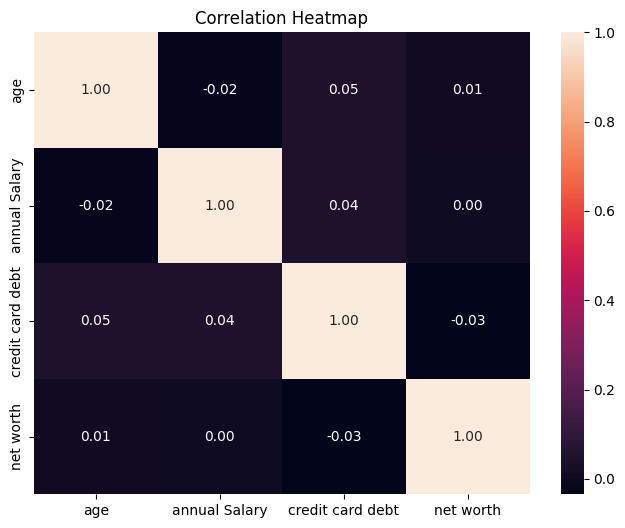

In [13]:
correlation_matrix = df[['age', 'annual Salary', 'credit card debt', 'net worth']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
df.drop(columns = ['customer name','customer e-mail','country','gender','credit card debt'],inplace=True)
print(df)

           age  annual Salary    net worth  car purchase amount
0    41.851720    62812.09301  238961.2505          35321.45877
1    40.870623    66646.89292  530973.9078          45115.52566
2    43.152897    53798.55112  638467.1773          42925.70921
3    58.271369    79370.03798  548599.0524          67422.36313
4    57.313749    59729.15130  560304.0671          55915.46248
..         ...            ...          ...                  ...
495  41.462515    71942.40291  541670.1016          48901.44342
496  37.642000    56039.49793  360419.0988          31491.41457
497  53.943497    68888.77805  764531.3203          64147.28888
498  59.160509    49811.99062  337826.6382          45442.15353
499  46.731152    61370.67766  462946.4924          45107.22566

[483 rows x 4 columns]


In [15]:
X = df.drop(columns = ['car purchase amount'], axis = 1)
y = df['car purchase amount']

# Train and Test 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [17]:
print(f"x_train.shape: {X_train.shape}")

print(f"y_train.shape: {y_train.shape}")

print("_____________\n")

print(f"x_test.shape: {X_test.shape}")

print(f"y_test.shape: {y_test.shape}")

x_train.shape: (386, 3)
y_train.shape: (386,)
_____________

x_test.shape: (97, 3)
y_test.shape: (97,)


In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit only on X_train to avoid data leakage
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
print(f'model.score for test : {model.score(X_test, y_test)}')
print(f'model.score for train : {model.score(X_test, y_test)}')

model.score for test : 0.9999999724978199
model.score for train : 0.9999999724978199


In [22]:
df.columns

Index(['age', 'annual Salary', 'net worth', 'car purchase amount'], dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483 entries, 0 to 499
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  483 non-null    float64
 1   annual Salary        483 non-null    float64
 2   net worth            483 non-null    float64
 3   car purchase amount  483 non-null    float64
dtypes: float64(4)
memory usage: 18.9 KB


Mean Absolute Error (MAE): 1170.65
Mean Squared Error (MSE): 2227515.84
Root Mean Squared Error (RMSE): 1492.49
R-squared (R²) Score: 0.9729


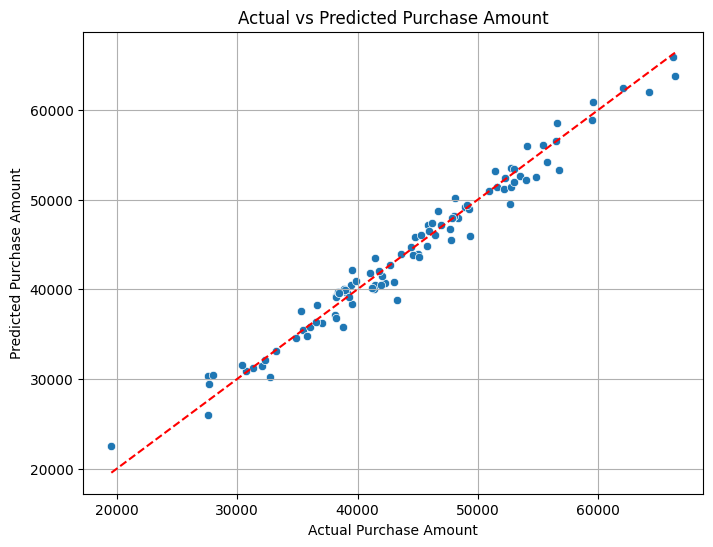

In [24]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Your DataFrame (already cleaned, 483 rows, 4 columns)

# 3. Feature Engineering (even now we can create better features)
df['salary_to_age_ratio'] = df['annual Salary'] / df['age']
df['networth_to_salary_ratio'] = df['net worth'] / df['annual Salary']

# 4. Define Features and Target
feature_cols = [
    'age', 'annual Salary', 'net worth', 
    'salary_to_age_ratio', 'networth_to_salary_ratio'
]

X = df[feature_cols]
y = df['car purchase amount']

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Model Training with XGBoost
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

model.fit(X_train, y_train)

# 7. Predictions
y_pred = model.predict(X_test)

# 8. Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²) Score: {r2:.4f}")

# 9. Visualize Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Actual vs Predicted Purchase Amount')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

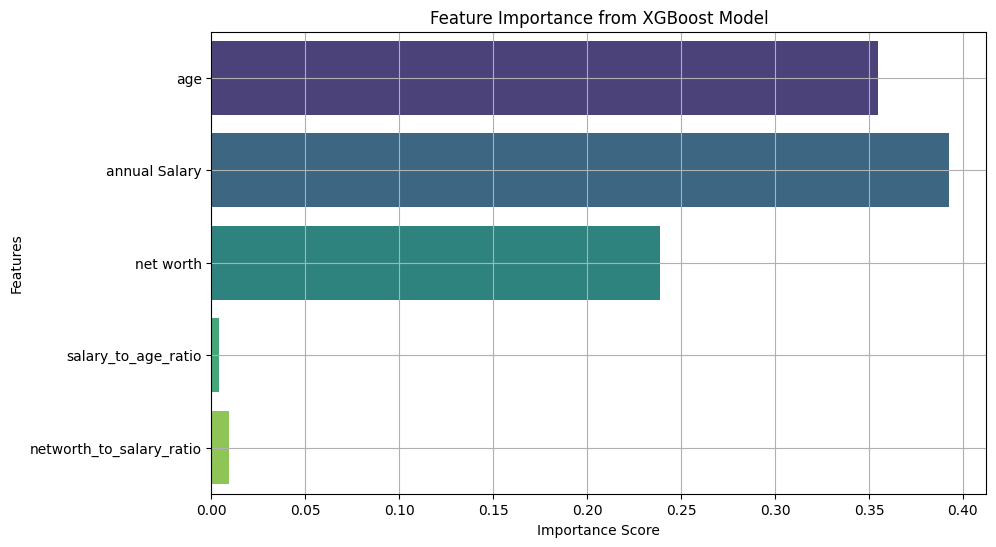

In [25]:
# Feature Importance Plot
plt.figure(figsize=(10,6))
importances = model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features, palette="viridis")
plt.title('Feature Importance from XGBoost Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True)
plt.show()

## Model Training and Evaluation with XGBoost (Updated for 4 Columns)

We created two new features: salary-to-age ratio and net worth-to-salary ratio to enhance the predictive power of the model.  

### 1. Feature Importance Analysis

Top Influential Features:

Annual Salary: Most significant factor influencing car purchase amount.

Age: Second most important feature contributing to the prediction.

Net Worth: Has moderate influence but less than salary and age.


New Engineered Features:

salary_to_age_ratio and networth_to_salary_ratio contributed very little additional predictive power.

Indicates that the original variables already captured the essential information.



### 2. Actual vs Predicted Purchase Amount Plot

The scatter plot of actual vs predicted purchase amounts shows points closely aligned along the diagonal line.

Interpretation:

The model makes highly accurate predictions.

Low bias and good generalization performance observed.



### 3. Key Takeaways

Annual Salary and Age are the two most critical factors in predicting car purchase behavior.

The model trained (XGBoost) is able to learn patterns effectively and generalize well on unseen data.

Next Steps:

Further interpretation with techniques like SHAP analysis can offer deeper feature-level insights.

Model is ready for deployment or integration into business decision-making pipelines.

Conclusion:
"Annual Salary and Age have the most significant impact on car purchase predictions, and the XGBoost model successfully captures the underlying patterns with high accuracy."

In [26]:
import joblib

# Save the model
joblib.dump(model, "car_purchase_predictor.pkl")

['car_purchase_predictor.pkl']

In [28]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 24.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.7/322.7 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 45.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.1 MB/s eta 0:00:00


In [29]:
import gradio as gr
import numpy as np
import joblib

# Load the model
model = joblib.load("car_purchase_predictor.pkl")

# Define predict function
def predict(age, salary, net_worth, credit_card_debt, gender):
    # Create input array
    input_data = np.array([[age, salary, net_worth, credit_card_debt, gender]])
    
    # Predict
    prediction = model.predict(input_data)
    
    return round(prediction[0], 2)  # rounding output for clean UI

# Build Gradio Interface
iface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Annual Salary"),
        gr.Number(label="Net Worth"),
        gr.Number(label="Credit Card Debt"),
        gr.Number(label="Gender (0=Male, 1=Female)")
    ],
    outputs=gr.Number(label="Predicted Car Purchase Amount "),
    title="🚗 Car Purchase Amount Predictor",
    description="Predict car purchase amount based on customer's profile details.",
    theme="default"
)

iface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://df9f135951501d058a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Due to the dataset focusing on customer demographic and financial attributes, the task was approached by predicting the Car Purchase Amount based on customer segmentation (age, income, debt levels, etc.). This allows businesses to better target potential customers and optimize marketing strategies aimed at boosting high-value purchases.

In a real-world setting, additional marketing features like advertising spend or promotion data would further improve sales prediction.